# 課題3 データの前処理と可視化

配点
- Q1, 1P
- Q2, 1P
- Q3, 2P
- Q4, 3P
- Q5, 3P


In [1]:
# 必要なモジュールの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 欠損値の処理
### 欠損値の検出
pandasのシリーズやデータフレームではデータに欠損値（例えば数値データ内の空値）が含まれる場合、欠損値が`NaN`となります。以下では欠損値（空値）を含む得点データのcsvファイル, 'score_missing.csv', を読み込み、データフレーム`score`を作成します。

In [2]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex3/score_missing.csv

--2022-10-28 08:44:19--  https://raw.githubusercontent.com/UTDataMining/2022A/master/ex3/score_missing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141 [text/plain]
Saving to: ‘score_missing.csv’

score_missing.csv   100%[===================>]     141  --.-KB/s    in 0s      

2022-10-28 08:44:19 (5.35 MB/s) - ‘score_missing.csv’ saved [141/141]



In [3]:
score = pd.read_csv('score_missing.csv')
score

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,NaN
1,39.0,21.0,50,56.0
2,NaN,NaN,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,NaN,53,NaN
6,29.0,26.0,44,52.0
7,NaN,54.0,37,59.0
8,45.0,NaN,7,44.0
9,68.0,41.0,29,81.0


データフレームに欠損値が含まれるかどうかはpandasの`isnull()`メソッドを使うと調べることができます。`isnull()`メソッドはデータフレームの各要素の値について、欠損値であれば`True`、欠損値でなければ`False`を要素としたデータフレームを返します。

`isnull()`メソッドの詳細は以下を参照してください。

[isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)

In [4]:
score.isnull()

,kokugo,shakai,sugaku,rika
0,False,False,False,True
1,False,False,False,False
2,True,True,False,False
3,False,False,False,False
4,False,False,False,False
5,False,True,False,True
6,False,False,False,False
7,True,False,False,False
8,False,True,False,False
9,False,False,False,False


`isnull()`メソッドで返された上記のデータフレームの`any()`メソッド使うと、データフレームにおいて欠損値を含む行または列を調べることができます。以下では、列ごとに欠損値を含むかどうかを示すシリーズオブジェクトを返します。

In [5]:
# 列ごとに欠損値があるか調べる
score.isnull().any()

kokugo     True
shakai     True
sugaku    False
rika       True
dtype: bool

上記で`any()メソッド`の引数`axis`を1とすると、行ごとに欠損値を含むかどうかを示すシリーズオブジェクトを返します。

In [6]:
# 行ごとに欠損値があるか調べる
score.isnull().any(axis=1)

0     True
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
9    False
dtype: bool

上記のシリーズオブジェクトを以下のようデータフレーム抽出の条件として用いると、元のデータフレームから欠損値を含む行または列からなるデータフレームを抽出できます。

In [7]:
# データフレームから欠損値を含む行を抽出
score[score.isnull().any(axis=1)]

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,NaN
2,NaN,NaN,23,57.0
5,66.0,NaN,53,NaN
7,NaN,54.0,37,59.0
8,45.0,NaN,7,44.0


In [8]:
# データフレームから欠損値を含む列を抽出
score.loc[:, score.isnull().any()]

,kokugo,shakai,rika
0,30.0,43.0,NaN
1,39.0,21.0,56.0
2,NaN,NaN,57.0
3,29.0,87.0,100.0
4,70.0,71.0,67.0
5,66.0,NaN,NaN
6,29.0,26.0,52.0
7,NaN,54.0,59.0
8,45.0,NaN,44.0
9,68.0,41.0,81.0


### 欠損値の削除
pandasの`dropna()`メソッドを使うと欠損値を含む行を削除したデータフレーム を返すことができます。`dropna()`メソッドでは、この他にもさまざまな方法で欠損値を削除することができます。詳細は以下を参照してください。

[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [9]:
score.dropna()

,kokugo,shakai,sugaku,rika
1,39.0,21.0,50,56.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
6,29.0,26.0,44,52.0
9,68.0,41.0,29,81.0


### 欠損値の補完
pandasの`fillna()`メソッドを使うと欠損値を補完したデータフレーム を返すことができます。以下では、欠損値が含まれる列の欠損がない要素の値の平均値でその列にある欠損値を補完しています。`fillna()`メソッドでは、この他にもさまざまな方法で欠損値を補完することができます。詳細は以下を参照してください。

[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [10]:
score = pd.read_csv('score_missing.csv')
score.fillna(score.mean())

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,64.5
1,39.0,21.0,50,56.0
2,47.0,49.0,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,49.0,53,64.5
6,29.0,26.0,44,52.0
7,47.0,54.0,37,59.0
8,45.0,49.0,7,44.0
9,68.0,41.0,29,81.0


## Q1
欠損値（空値）を含む得点データのcsvファイル, 'score_missing.csv', を読み込み作成したデータフレームを引数`df`で受け取り、各列の欠損値をその列の欠損がない要素の値の中央値で補完したデータフレームを返す`fill_median()`関数を完成させてください。

In [47]:
def fill_median(df):
  score.fillna(score.median(),inplace=True)
  return score

In [48]:
score = pd.read_csv('score_missing.csv') # csvファイル読み込み
fill_median(score) # 欠損値補完されたデータフレームを表示

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51,58.0
1,39.0,21.0,50,56.0
2,42.0,43.0,23,57.0
3,29.0,87.0,77,100.0
4,70.0,71.0,78,67.0
5,66.0,43.0,53,58.0
6,29.0,26.0,44,52.0
7,42.0,54.0,37,59.0
8,45.0,43.0,7,44.0
9,68.0,41.0,29,81.0


`fill_median()`関数が完成したら、以下のセルを実行して動作を確認してください。

In [49]:
df = fill_median(score) 
df.loc[2, 'kokugo']

42.0

結果は、`42.0`、となります。結果が異なる場合は、作成した`fill_median`関数に誤りがないか確認してください。

## Q2
整数を要素とする任意の長さの1次元配列を入力として引数`input_array`受け取り、配列の要素の値の中で、以下の外れ値の基準にあてはまる要素からなる1次元配列を返す`find_outliers()`関数を完成させてください。なお、IQRは四分位範囲であり、第3四分位から第1四分位を引いた値です。
- （第1四分位-1.5IQR）を値の下限としてそれより小さい値は外れ値とする
- （第3四分位+1.5IQR）を値の上限としてそれより大きい値は外れ値とする

配列の第1四分位と第3四分位は、NumPyの`percentile()`関数を用いて以下のように求められる。
```Python
第1四分位, 第3四分位=np.percentile(配列, [25, 75])
```

In [13]:
def find_outliers(arr):
  '''
  q1, q3 = arr.quantile(.25), arr.quantile(.75)
  iqr = q3 - q1
  lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
  '''
  Q1=np.percentile(arr,25)
  Q3=np.percentile(arr,75)
  IQR=Q3-Q1
  line=1.5*IQR
  res=[]
  for item in arr:
    if (item<Q1-line or item>Q3+line):
      res.append(item)
  
  return res

`find_outliers()`関数が完成したら、以下のセルを実行して動作を確認してください。

In [14]:
find_outliers(np.array([30,39,-100,29,95,70,67,200,29,1000,56,45,68]))

[-100, 200, 1000]

結果は、`array([-100,  200, 1000])`、となります。結果が異なる場合は、作成した`find_outliers`関数に誤りがないか確認してください。

## Q3
以下のような形式の"score_outlier.csv"ファイルを読み込み、データフレーム`score`を作成します。
```Python
## score_outlier.csvファイル
kokugo, shakai, sugaku, rika
30, 43, 51, 63
39, 21, 49, 56
...
```
`score`を引数`df`で受け取り、各列ごとに、Q2.1と同様に四分位範囲, 第3四分位, 第1四分位を用いて外れ値を検出し、**外れ値を含む行を除いた**データフレームを返す関数`drop_outliers()`を完成させてください。

データフレームの各列の第1四分位と第3四分位は、pandasの`quantile()`メソッドを用いて以下のように求められる。
```Python
第1四分位 = データフレーム[列名].quantile(0.25)
第3四分位 = データフレーム[列名].quantile(0.75)
```

In [15]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex3/score_outlier.csv

--2022-10-28 08:44:49--  https://raw.githubusercontent.com/UTDataMining/2022A/master/ex3/score_outlier.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2170 (2.1K) [text/plain]
Saving to: ‘score_outlier.csv’

score_outlier.csv   100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-10-28 08:44:49 (40.4 MB/s) - ‘score_outlier.csv’ saved [2170/2170]



In [16]:
def drop_outliers(df):
  for c in  df.columns:       
    q1 =df[c].quantile(0.25) # 第1四分位
    q3 =df[c].quantile(0.75) # 第3四分位
    iqr =q3-q1 # 四分位範囲

    df.loc[(df[c]>q3+1.5*iqr) | (df[c]<=q1-1.5*iqr),c] = None # 外れ値にNoneを代入
  return  df.dropna()

In [17]:
score = pd.read_csv('score_outlier.csv') # csvファイル読み込み
drop_outliers(score).head(10)  # 外れ値を含む行を除いたデータフレームを表示

,kokugo,shakai,sugaku,rika
0,30.0,43.0,51.0,63.0
1,39.0,21.0,49.0,56.0
2,29.0,30.0,23.0,57.0
3,95.0,87.0,77.0,100.0
4,70.0,71.0,78.0,67.0
5,67.0,53.0,56.0,61.0
6,29.0,26.0,44.0,52.0
7,56.0,54.0,37.0,59.0
8,45.0,21.0,7.0,44.0
9,68.0,41.0,29.0,81.0


`drop_outliers()`関数が完成したら、以下のセルを実行して動作を確認してください。

In [18]:
len(drop_outliers(score).index)

155

外れ値を含む行を除いたデータフレームの行数は`155`となります。

## 外れ値と箱ひげ図の可視化

`matplotlib`では、以下のようにして複数の1次元配列を入力として、それぞれを箱ひげ図として同時に可視化することができます。
```Python
plt.boxplot([配列1, 配列2, 配列3, ....], showmeans=True);
```

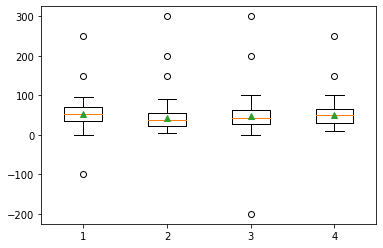

In [19]:
score = np.loadtxt("score_outlier.csv", delimiter=",", skiprows=1)
plt.boxplot([score[:,0], score[:,1], score[:,2], score[:,3]], showmeans=True);

## ヒストグラムの可視化
`matplotlib`では、以下のように1次配列を入力として、ヒストグラムを可視化することができます。
```Python
plt.hist(配列, bins=階級数);
```

In [20]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex3/exam_score.csv

--2022-10-28 08:45:00--  https://raw.githubusercontent.com/UTDataMining/2022A/master/ex3/exam_score.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991 (1.9K) [text/plain]
Saving to: ‘exam_score.csv’

exam_score.csv      100%[===================>]   1.94K  --.-KB/s    in 0s      

2022-10-28 08:45:00 (29.0 MB/s) - ‘exam_score.csv’ saved [1991/1991]



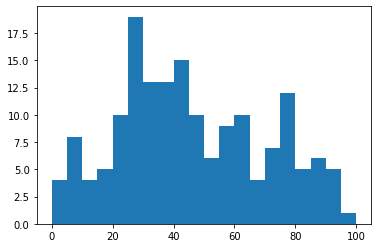

In [21]:
# 数学（3列目）の点数のヒストグラム
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
plt.hist(score[:,2], bins=20);

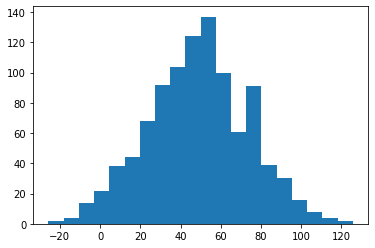

In [22]:
# 平均=muと標準偏差=stdの時の正規分布に従うランダムな値からなる配列を入力とするヒストグラム
mu, std = 50, 25
nor = np.random.normal(mu, std,1000)
plt.hist(nor, bins=20);

## Q4
### 散布図
`matplotlib`では、以下のように2つの1次配列を入力として、散布図を可視化することができます。
```Python
plt.plot(配列1, 配列2, 'o');
```

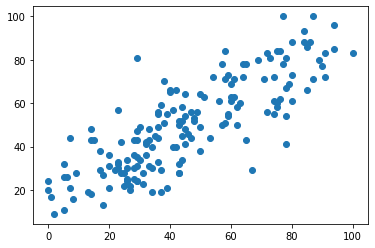

In [23]:
# 数学と理科の点数の散布図
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
plt.plot(score[:,2], score[:,3], 'o');

整数を要素とする同じ長さの2つの1次元配列を入力として引数`x`, `y`で受け取り、それらの配列の要素の相関係数を返す`correlation()`関数を完成させてください。2つの配列は先頭から順にそれぞれの要素が対応するものとします。それぞれの配列の対応する要素の値を$x_{i}, y_{i}$とすると、相関係数は以下のように求められます。

$\frac{1}{n}\Sigma^{n}_{i=1}(\frac{x_{i}-\overline{x}}{s_{x}})(\frac{y_{i}-\overline{y}}{s_{y}})$

$\overline{x}, \overline{y}$は平均、$s_{x}, s_{y}$は標準偏差です。

In [39]:
def correlation(x, y):
  xb=np.mean(x)
  yb=np.mean(y)
  sx=np.std(x)
  sy=np.std(y)
  temp=0
  n=len(x)
  for i in range(1,n):
    temp+=((x[i]-xb)/sx)*((y[i]-yb)/sy)
  res=temp/n
  return res

`correlation()`関数が完成したら、以下のセルを実行して動作を確認してください。

In [40]:
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
correlation(score[:,2], score[:,3])

0.8171220728787761

相関係数は、約`0.81`となります。

### 参考
NumPyの`corrcoef()`関数を使うと2つの1次元配列の相関係数を以下のように求めることができます。

In [27]:
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
np.corrcoef(score[:,2], score[:,3])

array([[1.        , 0.81794707],
       [0.81794707, 1.        ]])

pandasの`corr`メソッドを使うとデータフレームの列間の相関係数を以下のように求めることができます。

In [26]:
score = pd.read_csv("exam_score.csv", sep=",")
score.corr(method='pearson')

,kokugo,shakai,sugaku,rika
kokugo,1.000000,0.782622,0.718526,0.717996
shakai,0.782622,1.000000,0.778242,0.834075
sugaku,0.718526,0.778242,1.000000,0.817947
rika,0.717996,0.834075,0.817947,1.000000


これらの相関係数の大小に基づいて以下のように列間の相関の大小をヒートマップとして可視化することができます。

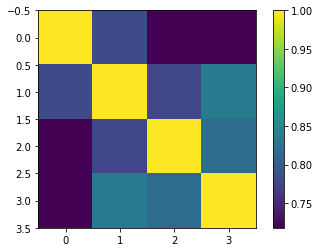

In [ ]:
plt.colorbar(plt.imshow(score.corr(method='pearson')));

## Q5
以下のような形式の"exam_score.csv"ファイルを読み込み作成したNumPyの配列を引数`X`で受け取り、各教科の点数をその教科の平均値と標準偏差を用いて標準化した配列を返す`normalize_score()`関数を完成させてください。平均値と標準偏差の計算には、NumPyの関数またはndarrayオブジェクトのメソッド、どちらを使ってもよいです。

```Python
## exam_score.csvファイル
kokugo, shakai, sugaku, rika
30, 43, 51, 63
39, 21, 49, 56
...
```

配列の列ごとに関数やメソッドを適用するには以下のように`axis`引数を0とする。
```Python
np.mean(配列, axis=0)
配列.mean(axis=0)
```

In [63]:
def normalize_score(X):
  '''
  xavg=np.mean(X,axis=0)
  xs=np.std(X,axis=0)
  res=[]
  for item in X:
    res.append((item-xavg)/xs)
  print(res)
  return res
  '''
  return ((X-X.mean())/X.std(ddof=0))

`normalize_score()`関数が完成したら、以下のセルを実行して動作を確認してください。

In [64]:
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
print(round(normalize_score(score)[:,0].var()))
print(round(normalize_score(score)[:,1].var()))
print(round(normalize_score(score)[:,2].var()))
print(round(normalize_score(score)[:,3].var()))

1
1
1
1


各教科の点数の分散は、約`1`となります。

### 参考
pandasでは以下のようにしてデータフレームの各列をその列の平均値と標準偏差を用いて標準化できます。

In [62]:
score_df = pd.read_csv('exam_score.csv')
((score_df - score_df.mean()) / score_df.std(ddof=0)).head(5)

,kokugo,shakai,sugaku,rika
0,-1.025785,0.158828,0.222884,0.614446
1,-0.612372,-0.869612,0.140113,0.286478
2,-1.071720,-0.448887,-0.935912,0.333331
3,1.959977,2.215709,1.298908,2.347991
4,0.811607,1.467753,1.340294,0.801856


## コードのテスト
以下の実行ボタンを押してから、設問ごとにCheck関数でコードのテストをしてください。

In [31]:
# コードのテストの前にこのセルを実行してください
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 24.1 MB/s 


## Q1

In [50]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1')

## Q2

In [33]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')

## Q3

In [34]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q3')

## Q4

In [42]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q4')

## Q5

In [65]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q5')